## K Nearest Neighbour Classifier

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=3, 
     n_redundant=1,
    n_classes=2, 
    random_state=999 
)

In [6]:
pd.DataFrame(X)

,0,1,2
0,-0.335050,0.028527,1.161931
1,-1.377463,-0.405821,0.443596
2,-1.045200,-0.723348,-3.104704
3,2.085399,0.758149,0.519318
4,1.762419,0.822554,1.945117
...,...,...,...
995,-1.040534,-0.211906,1.119179
996,-1.615211,-0.505609,0.273764
997,-0.756026,-0.518161,-2.203823
998,0.560663,-0.073358,-2.156603


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
classifier=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred=classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[148  13]
 [ 18 151]]
0.906060606060606
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       161
           1       0.92      0.89      0.91       169

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



# Hyperparameter Tuning


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [57]:
pipeline =Pipeline([
    ('scaler',StandardScaler()),
    ('knn',KNeighborsClassifier()),
])

In [68]:
pipeline.get_params().keys()


dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'scaler', 'knn', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'knn__algorithm', 'knn__leaf_size', 'knn__metric', 'knn__metric_params', 'knn__n_jobs', 'knn__n_neighbors', 'knn__p', 'knn__weights'])

In [63]:
param_grid = {
    'knn__n_neighbors': list(range(1, 11)),  
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [87]:
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=5,
                    refit=True,
                    scoring='accuracy',
                    n_jobs=1)

In [88]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'knn__algorithm': ['auto', 'ball_tree', 'kd_tree',
                                            'brute'],
                         'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [89]:
grid.best_params_

{'knn__algorithm': 'auto',
 'knn__metric': 'manhattan',
 'knn__n_neighbors': 6,
 'knn__weights': 'uniform'}

In [90]:
grid.best_score_

np.float64(0.9)

In [92]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

In [93]:
print("\nTest Accuracy:")
print(test_accuracy)


Test Accuracy:
0.896969696969697


In [94]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[150  18]
 [ 16 146]]
0.896969696969697
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       168
           1       0.89      0.90      0.90       162

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330



In [74]:
grid.cv_results_

{'mean_fit_time': array([0.00617156, 0.00480704, 0.00417175, 0.00297055, 0.00439677,
        0.00337834, 0.00315356, 0.00284004, 0.00305204, 0.00319223,
        0.00290155, 0.00286522, 0.00288353, 0.00309124, 0.00277276,
        0.00268245, 0.00278621, 0.00278578, 0.00269852, 0.00306687,
        0.00294476, 0.00286345, 0.00286064, 0.00279875, 0.0029099 ,
        0.00316458, 0.00539174, 0.00306473, 0.00458913, 0.00251331,
        0.00251303, 0.00221033, 0.00266294, 0.00222321, 0.00232635,
        0.0023283 , 0.00245595, 0.00289011, 0.00268826, 0.0025198 ,
        0.00447135, 0.00254722, 0.00289521, 0.00304031, 0.00249224,
        0.00403314, 0.00224209, 0.00295362, 0.00244017, 0.00228567,
        0.00252523, 0.00228257, 0.00229702, 0.00250978, 0.00226135,
        0.00232267, 0.00333323, 0.00283532, 0.00295815, 0.00211864,
        0.00243802, 0.00236845, 0.00245609, 0.00225935, 0.00223064,
        0.0025754 , 0.00256581, 0.00214529, 0.0022109 , 0.00247879,
        0.00222769, 0.00310063,

In [76]:

results = pd.DataFrame(grid.cv_results_)


In [78]:
results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__algorithm,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006172,0.001434,0.014372,0.000902,auto,euclidean,1,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.820896,0.888060,0.850746,0.880597,0.910448,0.870149,0.031165,141
1,0.004807,0.000807,0.004646,0.001313,auto,euclidean,1,distance,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.820896,0.888060,0.850746,0.880597,0.910448,0.870149,0.031165,141
2,0.004172,0.001132,0.013883,0.002670,auto,euclidean,2,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.820896,0.902985,0.858209,0.880597,0.865672,0.865672,0.027113,157
3,0.002971,0.000268,0.003963,0.001526,auto,euclidean,2,distance,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.820896,0.888060,0.850746,0.880597,0.910448,0.870149,0.031165,141
4,0.004397,0.002121,0.013738,0.004683,auto,euclidean,3,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.865672,0.880597,0.865672,0.902985,0.902985,0.883582,0.016754,121
5,0.003378,0.000762,0.003672,0.000364,auto,euclidean,3,distance,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.843284,0.880597,0.873134,0.910448,0.895522,0.880597,0.022635,125
6,0.003154,0.000617,0.012707,0.001739,auto,euclidean,4,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.880597,0.902985,0.880597,0.902985,0.895522,0.892537,0.010123,65
7,0.002840,0.000253,0.003505,0.000420,auto,euclidean,4,distance,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.865672,0.880597,0.873134,0.910448,0.917910,0.889552,0.020789,85
8,0.003052,0.000327,0.012787,0.001807,auto,euclidean,5,uniform,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.880597,0.873134,0.873134,0.895522,0.910448,0.886567,0.014471,105
9,0.003192,0.000507,0.003347,0.000272,auto,euclidean,5,distance,"{'knn__algorithm': 'auto', 'knn__metric': 'euc...",0.865672,0.880597,0.865672,0.917910,0.917910,0.889552,0.023787,85


In [79]:
k_vs_acc = (
    results
    .groupby("param_knn__n_neighbors")["mean_test_score"]
    .mean()
)

In [80]:
k_vs_acc

param_knn__n_neighbors
1     0.873134
2     0.869776
3     0.884701
4     0.889925
5     0.888806
6     0.893284
7     0.897388
8     0.895149
9     0.898507
10    0.895522
Name: mean_test_score, dtype: float64

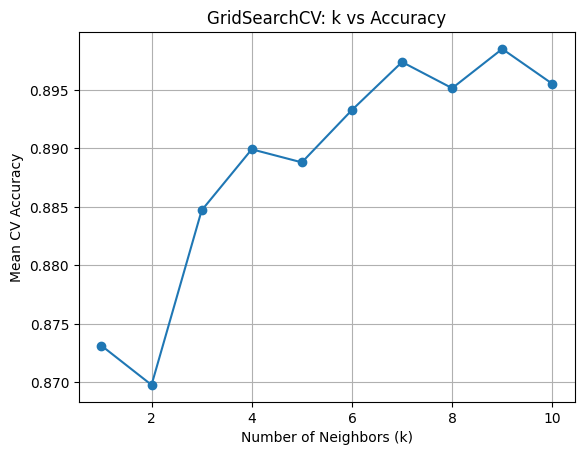

In [81]:

k_vs_acc = (
    results
    .groupby("param_knn__n_neighbors")["mean_test_score"]
    .mean()
)

plt.plot(k_vs_acc.index, k_vs_acc.values, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("GridSearchCV: k vs Accuracy")
plt.grid(True)
plt.show()


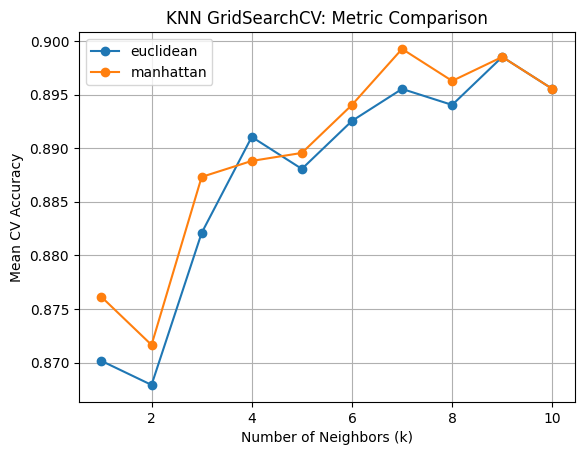

In [82]:
for metric in results["param_knn__metric"].unique():
    subset = results[results["param_knn__metric"] == metric]
    
    k_vs_acc = (
        subset
        .groupby("param_knn__n_neighbors")["mean_test_score"]
        .mean()
    )
    
    plt.plot(k_vs_acc.index, k_vs_acc.values, marker='o', label=metric)

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Mean CV Accuracy")
plt.title("KNN GridSearchCV: Metric Comparison")
plt.legend()
plt.grid(True)
plt.show()
